<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/dnn_vsLeeNet_Handwritten_digit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **DNN vs CNN application in Handwritten digit MNIST**

---

**Context**

In this study, we will compare the network performance between deep neural network (DNN) and LeNet-5 convolution neural network (CNN).

* We will conduct the experiment using MNIST as the dataset. This dataset is a collection of 70,000 handwritting images, consisting of 60,000 examples in the training set (X_train) and 10,000 examples in the test set (X_test).

* All images are grayscale with a size of 28x28 pixels (784 pixels total).

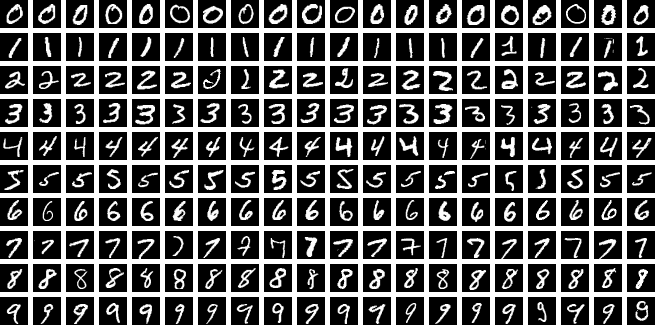

**Importing libraries**

In [1]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard
import datetime

# Delete all tensorboard data records from previous executions
!rm -rf ./logs/

**Loading dataset**

In [2]:
# Loading dataset
mnist=keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Preprocessing**

In [3]:
# Normalize pixels value
X_train, X_test = X_train/255.0, X_test/255.0

In [4]:
# Check shape
X_train.shape

(60000, 28, 28)

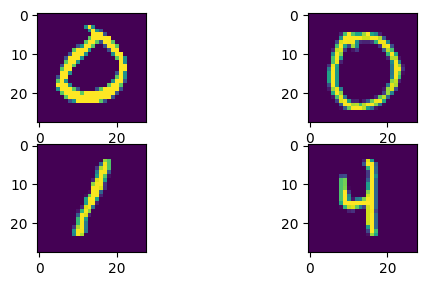

In [5]:
# Let's look at Handwritten MNIST data

import matplotlib.pyplot as plt
import numpy as np

i= np.random.randint(0, len(X_train)-5)
plt.subplot(3,2,1)
plt.imshow(X_train[i])
plt.subplot(3,2,2)
plt.imshow(X_train[i+1])
plt.subplot(3,2,3)
plt.imshow(X_train[i+2])
plt.subplot(3,2,4)
plt.imshow(X_train[i+3])
plt.show()

## **Deep Neural Network**

We want to build Deep Neural Network model. This is a two-layer fully connected deep neural network with dropout regularization and softmax output, designed to learn nonlinear representations of 28×28 grayscale images for 10-class classification.

In [6]:
# Create logging directory and tensorboard monitoring
log_dir = "DNN/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [7]:
# Model architecture
# DNN with two hidden layers, ADAM Optimizer, Regulation Dropout
model = keras.models.Sequential()
# Input layer
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Convert into 784 dimensional vector
model.add(keras.layers.Dropout(0.3)) # Regularization dropout
# 1st Hidden layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3)) # Regularization dropout
# 2nd Hidden layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3)) # Regularization dropout
# Output layer
model.add(keras.layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model training
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128, callbacks=[tensorboard_callback])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6656 - loss: 1.0168 - val_accuracy: 0.9377 - val_loss: 0.2094
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8982 - loss: 0.3384 - val_accuracy: 0.9537 - val_loss: 0.1534
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9206 - loss: 0.2623 - val_accuracy: 0.9626 - val_loss: 0.1264
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9322 - loss: 0.2240 - val_accuracy: 0.9672 - val_loss: 0.1119
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9366 - loss: 0.2066 - val_accuracy: 0.9694 - val_loss: 0.1043
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9419 - loss: 0.1869 - val_accuracy: 0.9703 - val_loss: 0.0992
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9484 - loss: 0.1747 - val_accuracy: 0.9716 - val_loss: 0.0932
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9494 - loss: 0.1641 - val_accuracy: 0.

In [10]:
# Evaluation to test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9763 - loss: 0.0827


[0.06901753693819046, 0.9810000061988831]

We get 98.1% accuracy

## **LeNet-5**

Now we will build LeNet-5 CNN model. We will load new dataset. Before building the model, we will do preprocessing data with padding and normalization.

**Loading dataset**

In [11]:
# Loading dataset
mnist=keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Preprocessing**

In [12]:
# Padding and normalization
X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255

LeNet-5 originally expects 32×32 input images, not 28×28.
so we need to make MNIST compatible with LeNet architecture.

In [13]:
# Check shape
X_train.shape
tf.TensorShape([60000, 32, 32])

TensorShape([60000, 32, 32])

We have 60,000 images with 32×32 pixels. However, we still have no channel dimension yet.

In [14]:
# Add channel dimension
X_train = tf.expand_dims(X_train, axis=3, name=None) # We adds a new dimension at index 3.
X_test = tf.expand_dims(X_test, axis=3, name=None)

In [15]:
# Check final shape
X_train.shape
tf.TensorShape([60000, 32, 32, 1])

TensorShape([60000, 32, 32, 1])

In [16]:
# TensorBoard setup
log_dir = "LeNet-5/"
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

**CNN model (LeNet-5 architecture)**

We will implement LeNet-5 Convolution neural network model. It model consists of two convolutional layers with average pooling for spatial downsampling, followed by three fully connected layers. The architecture initially extracts low-level features (edges, strokes), then progressively extract higher-level digit structures, and finally performs classification using a softmax output layer.

In [17]:

# We construct a Sequential CNN model (LeNet-5 architecture)
model = keras.models.Sequential()

# Convolution Layer 1 (C1)
# - 6 filters
# - Kernel size: 5x5
# - Activation: tanh (original LeNet activation)
# - Input shape: 32x32 grayscale image
# - Output size: (28, 28, 6)
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(32,32,1)))

# Average Pooling Layer 1 (S2)
# - Pool size: 2x2
# - Stride: 2
# - Downsamples feature maps by factor of 2
# - Output size: (14, 14, 6)
model.add(keras.layers.AveragePooling2D(pool_size =(2, 2), strides =(2, 2)))

# Convolution layer 2 (C3)
# - 16 filters
# - Kernel size: 5x5
# - Activation: tanh
# - Extracts higher-level spatial features
# - Output size: (10, 10, 16)
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))

# Average Pooling Layer 2 (S4)
# - Pool size: 2x2
# - Stride: 2
# - Further spatial downsampling
# - Output size: (5, 5, 16)
model.add(keras.layers.AveragePooling2D(pool_size =(2, 2), strides =(2, 2)))

# Flatten layer
# - Converts 3D feature maps into 1D vector
# - 5 x 5 x 16 = 400 features
model.add(keras.layers.Flatten())

# Fully Connected Layer 1 (F5)
# - 120 neurons
# - Activation: tanh
# - Learns abstract digit representations
model.add(keras.layers.Dense(units=120, activation='tanh'))

# Fully Connected Layer 2 (F6)
# - 84 neurons
# - Activation: tanh
# - Further feature abstraction
model.add(keras.layers.Dense(units=84, activation='tanh'))

# Output layer
# - 10 neurons (digits 0–9)
# - Softmax activation
# - Produces probability distribution over classes
model.add(keras.layers.Dense(units=10, activation = 'softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Model training
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128, callbacks=[tensorboard_callback2])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8007 - loss: 0.6918 - val_accuracy: 0.9497 - val_loss: 0.1730
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9546 - loss: 0.1502 - val_accuracy: 0.9708 - val_loss: 0.1040
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9730 - loss: 0.0908 - val_accuracy: 0.9735 - val_loss: 0.0888
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0654 - val_accuracy: 0.9755 - val_loss: 0.0811
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0546 - val_accuracy: 0.9814 - val_loss: 0.0632
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9887 - loss: 0.0381 - val_accuracy: 0.9819 - val_loss: 0.0608
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9815 - val_loss: 0.0598
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0

**Model evaluation**

In [20]:
# Evaluation to test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9860 - loss: 0.0613


[0.05407990887761116, 0.987500011920929]

**Conclusion**

We get higher accuracy with the LeNet-5 (Accuracy 98.7%) than first model with deep neural network (Accuracy 98,1%)